In [22]:
import numpy as np
def rdnumpy(txtname):
    f = open(txtname)
    line = f.readlines()
    lines = len(line)  # row number
    for l in line:
        le = l.strip('\n').split(',')
        columns = len(le)-1  # col
        #print(le)
        #print(columns)
 
    A = np.zeros((lines, columns+1), dtype=np.single)
    print("read lines:",lines)
    print("read columns:",columns+1)
    A_row = 0
    for lin in line:
        #print(A_row)
        list = lin.strip('\n').split(',')
        A[A_row:] = list[0:columns+1]
        A_row += 1
    return A

In [23]:
#### Train &Test: 3360+1440

# Model

In [24]:
import numpy as np
import torch
from torch.utils.data import Dataset,DataLoader
from torchvision.transforms import ToTensor, ToPILImage, Lambda
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [25]:
n_epochs = 3
batch_size_train = 6 #32,或者16-由於數據集比較小
batch_size_test = 1440*3
learning_rate = 0.001 #0.0001
momentum = 0.5
log_interval = 10
random_seed = 1
torch.manual_seed(random_seed)

# test

In [26]:
#TrainDataf1=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat19\MTrainGf1.txt"))
#TrainDataw0=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat19\MTrainGw0.txt"))
#TrainDatam3=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat19\MTrainGm3.txt"))

In [27]:
i=1        
startRow=i*8;
enRow=(i+1)*8;
#TrainDataf1[startRow:enRow,1:9]


In [28]:
class ScottTrainDataset(Dataset):
    def __init__(self, transform=None, target_transform=None):
        TrainDataf1=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat23\MTrainGf1.txt"))
        TrainDataw0=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat23\MTrainGw0.txt"))
        TrainDatam3=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat23\MTrainGm3.txt"))
        #TrainDataq4=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat16\MTrainGq4.txt"))
        
        self.AllTrainData=torch.cat((TrainDataw0,TrainDataf1,TrainDatam3),0)
        # 定义transform
        self.transform = transform
        self.target_transform = target_transform
 
    def __len__(self):
        '''返回数据集中的样本数'''
        return 420*3
 
    def __getitem__(self, index):#需要第index個的數據
        '''获取数据的方法，会和Dataloader连用'''
        i=index;        
        startRow=i*8;
        enRow=(i+1)*8;
        nowData=self.AllTrainData[startRow:enRow,2:7]
        
        if index>=0 and index<420:
            nowLabel=1
        elif index>=420 and index<420*2:
            nowLabel=0
        elif index>=420*2 and index<420*3:
            nowLabel=2
            
        if self.transform:
            nowData = self.transform(nowData)
        if self.target_transform:
            nowLabel = self.target_transform(nowLabel)
        '''
        if nowLabel==0:
            nowLabel = torch.FloatTensor([1, 0])
        else:
            nowLabel = torch.FloatTensor([0, 1])
        '''
        return nowData, nowLabel#需要返回數據和標簽

In [29]:
class ScottTestDataset(Dataset):
    def __init__(self, transform=None, target_transform=None):
        TestDataf1=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat23\MTestGf1.txt"))
        TestDataw0=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat23\MTestGw0.txt"))
        TestDatam3=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat23\MTestGm3.txt"))
        #TestDataq4=torch.as_tensor(rdnumpy("D:\FYP-HPC\Data_Python\GCN_PAPER_DiffRat_6F_1s\Rat16\MTestGq4.txt"))
        
        self.AllTrainData=torch.cat((TestDataw0,TestDataf1,TestDatam3),0)
        # 定义transform
        self.transform = transform
        self.target_transform = target_transform
 
    def __len__(self):
        '''返回数据集中的样本数'''
        return 180*3
 
    def __getitem__(self, index):#需要第index個的數據
        '''获取数据的方法，会和Dataloader连用'''
        i=index;        
        startRow=i*8;
        enRow=(i+1)*8;
        nowData=self.AllTrainData[startRow:enRow,2:7]
        
        if index>=0 and index<180:
            nowLabel=1
        elif index>=180 and index<180*2:
            nowLabel=0
        elif index>=180*2 and index<180*3:
            nowLabel=2
            
        if self.transform:
            nowData = self.transform(nowData)
        if self.target_transform:
            nowLabel = self.target_transform(nowLabel)
            
        '''
        if nowLabel==0:
            nowLabel = torch.FloatTensor([1, 0])
        else:
            nowLabel = torch.FloatTensor([0, 1])
        '''
            
        return nowData, nowLabel#需要返回數據和標簽

In [30]:
train_loader = torch.utils.data.DataLoader(ScottTrainDataset(),
    batch_size=batch_size_train, shuffle=True)


test_loader = torch.utils.data.DataLoader(ScottTestDataset(),
    batch_size=batch_size_test, shuffle=True)

read lines: 3360
read columns: 9
read lines: 3360
read columns: 9
read lines: 3360
read columns: 9
read lines: 1440
read columns: 9
read lines: 1440
read columns: 9
read lines: 1440
read columns: 9


# Network

In [31]:
#https://zhuanlan.zhihu.com/p/199624393
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=2, padding=1)
        self.conv2 = nn.Conv2d(10,20, kernel_size=3, padding=1)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(40, 15)
        self.fc2 = nn.Linear(15, 3)
    def forward(self, x):
        ##print(x)##
        #print("begin")
        #print(x.shape)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        #print("relu1:")
        #print(x.shape)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        #print("relu2:")
        #print(x.shape)
        x = x.view(-1,40)
        #print("view:")
        #print(x.shape)
        x = F.relu(self.fc1(x))
        #print("relu3:")
        #print(x.shape)
        x = F.dropout(x, training=self.training) 
        #print("dropout")
        #print(x.shape)
        x = self.fc2(x)
        #print("fc2")
        #print(x.shape)
        return F.log_softmax(x, dim=-1)
network = Net()
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

In [32]:
network = Net()
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

# Train

In [33]:
#for batch_idx, (data, target) in enumerate(train_loader):
        #print(data.shape)
        #print(data)

In [34]:
train_losses = []
train_counter = []

def train(epoch):
  for _ in range(epoch):
      network.train()
      for batch_idx, (data, target) in enumerate(train_loader):
        #if batch_idx>1920 and batch_idx<1920+320: continue
        optimizer.zero_grad()
        data = data.unsqueeze(1)
        #print(data.shape)
        #print(data)
        output = network(data)
        #print(target.shape, target, output)
        #assert 1==0
        #loss = F.binary_cross_entropy_with_logits(output, target)
        ##
        #print("output:")
        #print(output)
        #print("target:")
        #print(target)
        #print(target.shape)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        '''
        print(torch.isnan(data).sum(), (target==1).sum()+(target==0).sum())
        assert (target==1).sum()+(target==0).sum()==16
        print(torch.isnan(data).sum(), target.shape, target, output)
        if torch.isnan(output).sum()!=0:
            print(data, target, torch.isnan(data).sum())
            print(data[-5])
        assert torch.isnan(output).sum()==0
        assert torch.isnan(loss).sum()==0
        '''
        if batch_idx % log_interval == 0:
          #print(torch.isnan(data).sum(), target.shape, target, output)
          print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            _ , batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
          train_losses.append(loss.item())
          train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
          torch.save(network.state_dict(), './model.pth')
          torch.save(optimizer.state_dict(), './optimizer.pth')
          #print(network.state_dict())
    
train(50)

Train Epoch: 0 [0/1260 (0%)]	Loss: 1.113686
Train Epoch: 0 [60/1260 (5%)]	Loss: 1.162921
Train Epoch: 0 [120/1260 (10%)]	Loss: 1.096305
Train Epoch: 0 [180/1260 (14%)]	Loss: 1.095445
Train Epoch: 0 [240/1260 (19%)]	Loss: 1.059523
Train Epoch: 0 [300/1260 (24%)]	Loss: 1.089115
Train Epoch: 0 [360/1260 (29%)]	Loss: 1.090618
Train Epoch: 0 [420/1260 (33%)]	Loss: 1.107958
Train Epoch: 0 [480/1260 (38%)]	Loss: 1.106466
Train Epoch: 0 [540/1260 (43%)]	Loss: 1.139378
Train Epoch: 0 [600/1260 (48%)]	Loss: 1.034878
Train Epoch: 0 [660/1260 (52%)]	Loss: 0.977875
Train Epoch: 0 [720/1260 (57%)]	Loss: 1.094582
Train Epoch: 0 [780/1260 (62%)]	Loss: 1.002552
Train Epoch: 0 [840/1260 (67%)]	Loss: 1.007571
Train Epoch: 0 [900/1260 (71%)]	Loss: 0.974323
Train Epoch: 0 [960/1260 (76%)]	Loss: 1.133479
Train Epoch: 0 [1020/1260 (81%)]	Loss: 0.769379
Train Epoch: 0 [1080/1260 (86%)]	Loss: 0.781785
Train Epoch: 0 [1140/1260 (90%)]	Loss: 0.941150
Train Epoch: 0 [1200/1260 (95%)]	Loss: 0.891170
Train Epoch: 1

Train Epoch: 8 [420/1260 (33%)]	Loss: 0.154916
Train Epoch: 8 [480/1260 (38%)]	Loss: 0.070903
Train Epoch: 8 [540/1260 (43%)]	Loss: 0.091635
Train Epoch: 8 [600/1260 (48%)]	Loss: 0.207916
Train Epoch: 8 [660/1260 (52%)]	Loss: 0.183701
Train Epoch: 8 [720/1260 (57%)]	Loss: 0.338051
Train Epoch: 8 [780/1260 (62%)]	Loss: 0.134490
Train Epoch: 8 [840/1260 (67%)]	Loss: 0.185813
Train Epoch: 8 [900/1260 (71%)]	Loss: 0.053940
Train Epoch: 8 [960/1260 (76%)]	Loss: 0.214474
Train Epoch: 8 [1020/1260 (81%)]	Loss: 0.651120
Train Epoch: 8 [1080/1260 (86%)]	Loss: 0.139189
Train Epoch: 8 [1140/1260 (90%)]	Loss: 0.027020
Train Epoch: 8 [1200/1260 (95%)]	Loss: 0.438557
Train Epoch: 9 [0/1260 (0%)]	Loss: 0.523242
Train Epoch: 9 [60/1260 (5%)]	Loss: 0.076776
Train Epoch: 9 [120/1260 (10%)]	Loss: 0.108589
Train Epoch: 9 [180/1260 (14%)]	Loss: 0.122713
Train Epoch: 9 [240/1260 (19%)]	Loss: 0.143170
Train Epoch: 9 [300/1260 (24%)]	Loss: 0.152416
Train Epoch: 9 [360/1260 (29%)]	Loss: 0.375415
Train Epoch: 9

Train Epoch: 16 [900/1260 (71%)]	Loss: 0.821012
Train Epoch: 16 [960/1260 (76%)]	Loss: 0.005261
Train Epoch: 16 [1020/1260 (81%)]	Loss: 0.559688
Train Epoch: 16 [1080/1260 (86%)]	Loss: 0.034142
Train Epoch: 16 [1140/1260 (90%)]	Loss: 0.073853
Train Epoch: 16 [1200/1260 (95%)]	Loss: 0.023658
Train Epoch: 17 [0/1260 (0%)]	Loss: 0.016976
Train Epoch: 17 [60/1260 (5%)]	Loss: 0.174320
Train Epoch: 17 [120/1260 (10%)]	Loss: 0.126359
Train Epoch: 17 [180/1260 (14%)]	Loss: 0.442282
Train Epoch: 17 [240/1260 (19%)]	Loss: 0.119029
Train Epoch: 17 [300/1260 (24%)]	Loss: 0.393582
Train Epoch: 17 [360/1260 (29%)]	Loss: 0.197017
Train Epoch: 17 [420/1260 (33%)]	Loss: 0.060081
Train Epoch: 17 [480/1260 (38%)]	Loss: 0.051946
Train Epoch: 17 [540/1260 (43%)]	Loss: 0.540327
Train Epoch: 17 [600/1260 (48%)]	Loss: 0.209188
Train Epoch: 17 [660/1260 (52%)]	Loss: 0.745685
Train Epoch: 17 [720/1260 (57%)]	Loss: 0.019218
Train Epoch: 17 [780/1260 (62%)]	Loss: 0.068194
Train Epoch: 17 [840/1260 (67%)]	Loss: 0.

Train Epoch: 25 [0/1260 (0%)]	Loss: 0.126607
Train Epoch: 25 [60/1260 (5%)]	Loss: 0.413516
Train Epoch: 25 [120/1260 (10%)]	Loss: 0.003504
Train Epoch: 25 [180/1260 (14%)]	Loss: 0.072355
Train Epoch: 25 [240/1260 (19%)]	Loss: 0.054648
Train Epoch: 25 [300/1260 (24%)]	Loss: 0.191900
Train Epoch: 25 [360/1260 (29%)]	Loss: 0.278381
Train Epoch: 25 [420/1260 (33%)]	Loss: 0.502421
Train Epoch: 25 [480/1260 (38%)]	Loss: 0.178661
Train Epoch: 25 [540/1260 (43%)]	Loss: 0.069981
Train Epoch: 25 [600/1260 (48%)]	Loss: 0.287737
Train Epoch: 25 [660/1260 (52%)]	Loss: 0.019503
Train Epoch: 25 [720/1260 (57%)]	Loss: 0.802434
Train Epoch: 25 [780/1260 (62%)]	Loss: 0.370824
Train Epoch: 25 [840/1260 (67%)]	Loss: 0.229232
Train Epoch: 25 [900/1260 (71%)]	Loss: 0.062623
Train Epoch: 25 [960/1260 (76%)]	Loss: 0.282122
Train Epoch: 25 [1020/1260 (81%)]	Loss: 0.167768
Train Epoch: 25 [1080/1260 (86%)]	Loss: 0.025392
Train Epoch: 25 [1140/1260 (90%)]	Loss: 0.259950
Train Epoch: 25 [1200/1260 (95%)]	Loss: 0.

Train Epoch: 33 [420/1260 (33%)]	Loss: 0.082491
Train Epoch: 33 [480/1260 (38%)]	Loss: 0.014345
Train Epoch: 33 [540/1260 (43%)]	Loss: 0.051720
Train Epoch: 33 [600/1260 (48%)]	Loss: 0.205404
Train Epoch: 33 [660/1260 (52%)]	Loss: 0.171540
Train Epoch: 33 [720/1260 (57%)]	Loss: 0.044164
Train Epoch: 33 [780/1260 (62%)]	Loss: 0.110778
Train Epoch: 33 [840/1260 (67%)]	Loss: 0.193088
Train Epoch: 33 [900/1260 (71%)]	Loss: 0.115772
Train Epoch: 33 [960/1260 (76%)]	Loss: 0.067216
Train Epoch: 33 [1020/1260 (81%)]	Loss: 0.013065
Train Epoch: 33 [1080/1260 (86%)]	Loss: 0.113461
Train Epoch: 33 [1140/1260 (90%)]	Loss: 0.056467
Train Epoch: 33 [1200/1260 (95%)]	Loss: 0.203008
Train Epoch: 34 [0/1260 (0%)]	Loss: 0.024552
Train Epoch: 34 [60/1260 (5%)]	Loss: 0.494190
Train Epoch: 34 [120/1260 (10%)]	Loss: 0.031180
Train Epoch: 34 [180/1260 (14%)]	Loss: 0.004068
Train Epoch: 34 [240/1260 (19%)]	Loss: 0.024500
Train Epoch: 34 [300/1260 (24%)]	Loss: 0.010812
Train Epoch: 34 [360/1260 (29%)]	Loss: 0.

Train Epoch: 41 [1140/1260 (90%)]	Loss: 0.083743
Train Epoch: 41 [1200/1260 (95%)]	Loss: 0.217266
Train Epoch: 42 [0/1260 (0%)]	Loss: 0.341633
Train Epoch: 42 [60/1260 (5%)]	Loss: 0.004618
Train Epoch: 42 [120/1260 (10%)]	Loss: 0.035406
Train Epoch: 42 [180/1260 (14%)]	Loss: 0.002925
Train Epoch: 42 [240/1260 (19%)]	Loss: 0.000622
Train Epoch: 42 [300/1260 (24%)]	Loss: 0.006200
Train Epoch: 42 [360/1260 (29%)]	Loss: 0.035220
Train Epoch: 42 [420/1260 (33%)]	Loss: 0.208757
Train Epoch: 42 [480/1260 (38%)]	Loss: 0.263507
Train Epoch: 42 [540/1260 (43%)]	Loss: 0.004809
Train Epoch: 42 [600/1260 (48%)]	Loss: 0.003008
Train Epoch: 42 [660/1260 (52%)]	Loss: 0.053944
Train Epoch: 42 [720/1260 (57%)]	Loss: 0.019714
Train Epoch: 42 [780/1260 (62%)]	Loss: 0.158085
Train Epoch: 42 [840/1260 (67%)]	Loss: 0.190228
Train Epoch: 42 [900/1260 (71%)]	Loss: 0.151854
Train Epoch: 42 [960/1260 (76%)]	Loss: 0.274991
Train Epoch: 42 [1020/1260 (81%)]	Loss: 0.021514
Train Epoch: 42 [1080/1260 (86%)]	Loss: 0.

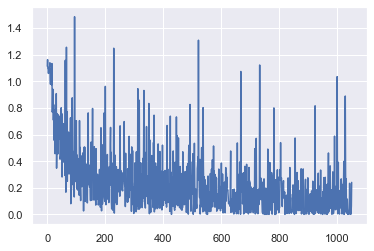

In [35]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt

plt.plot(list(range(len(train_losses))), train_losses)
plt.show()

In [36]:
'''
for p in network.parameters():
    print(p)
    break
tmp = torch.load('./model.pth')
network.load_state_dict(tmp)
for p in network.parameters():
    print(p)
    break
'''

"\nfor p in network.parameters():\n    print(p)\n    break\ntmp = torch.load('./model.pth')\nnetwork.load_state_dict(tmp)\nfor p in network.parameters():\n    print(p)\n    break\n"

In [37]:
import scipy.io as io
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data = data.unsqueeze(1)
      #print("data:")
      #print(data.shape)
      output = network(data)
      #print("output:")
      #print(output.shape)
      
      test_loss += F.nll_loss(output, target, size_average=False).item()
      #print(output)
      pred = output.data.max(1, keepdim=True)[1]
      #print(pred)###
      result1 = np.array(pred)
      np.savetxt('pred.txt',result1)
      result2 = np.array(target)
      np.savetxt('target.txt',result2)
      
      #Save done
      correct += pred.eq(target.data.view_as(pred)).sum()
      
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
    
test()


Test set: Avg. loss: 0.0743, Accuracy: 531/540 (98.33%)



C:\Users\PCI\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [38]:
'''
import scipy.io as io
result1 = np.array(result1)
np.savetxt('npresult1.txt',result1)
'''

"\nimport scipy.io as io\nresult1 = np.array(result1)\nnp.savetxt('npresult1.txt',result1)\n"

In [39]:
'''
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()
'''

"\nfor epoch in range(1, n_epochs + 1):\n  train(epoch)\n  test()\nimport matplotlib.pyplot as plt\nfig = plt.figure()\nplt.plot(train_counter, train_losses, color='blue')\nplt.scatter(test_counter, test_losses, color='red')\nplt.legend(['Train Loss', 'Test Loss'], loc='upper right')\nplt.xlabel('number of training examples seen')\nplt.ylabel('negative log likelihood loss')\nplt.show()\n"

# confusion matrix

In [40]:
  import scipy.io as io
  test_losses = []
  test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data = data.unsqueeze(1)
      #print("data:")
      #print(data.shape)
      output = network(data)
      #print("output:")
      #print(output.shape)
      
      test_loss += F.nll_loss(output, target, size_average=False).item()
      #print(output)
      pred = output.data.max(1, keepdim=True)[1]
      #print(pred)###
      result1 = np.array(pred)
      #np.savetxt('pred.txt',result1)
      result2 = np.array(target)
      #np.savetxt('target.txt',result2)
      
      #Save done
      correct += pred.eq(target.data.view_as(pred)).sum()
      
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


Test set: Avg. loss: 0.0743, Accuracy: 531/540 (98%)



In [41]:
from sklearn.metrics import f1_score
 
y_true = target
y_pred = pred
 
print(f1_score(y_true, y_pred, average='weighted'))# unbalance F1
print(f1_score(y_true, y_pred, average='macro'))
print()
print(f1_score(y_true, y_pred, average=None))
print("Acute       Normal      Chronic")

0.9832666641508484
0.9832666641508485

[0.9862259  0.98630137 0.97727273]
Acute       Normal      Chronic


[[ 99.44   0.56   0.  ]
 [  0.   100.     0.  ]
 [  2.22   2.22  95.56]]


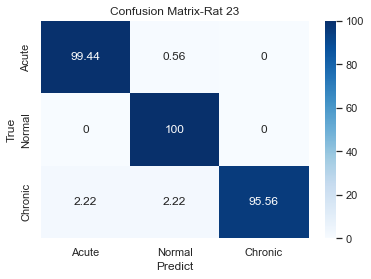

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sns.set()
f,ax = plt.subplots()
y_true =(target)
y_pred = (pred)
C2 = confusion_matrix(y_true,y_pred,labels=[0,1,2])

fm=C2.sum(axis=1)
C3=C2/fm*100
C3=np.around(C3,decimals=2)

print(C3)
a=sns.heatmap(C3,annot=True,ax=ax, cmap = 'Blues', fmt='g') #画热力图  , cbar = None

ax.set_title('Confusion Matrix-Rat 23') #标题
ax.set_xlabel('Predict') #x 轴
ax.set_ylabel('True') #y 轴


#Normal, Acute, Chronic, Pre-seizure
a.set_xticklabels(['Acute','Normal','Chronic'])
a.set_yticklabels(['Acute','Normal','Chronic'])


fig = a.get_figure()
fig.savefig("6F_3C.png", dpi=1080)